**STEP 1**: Identify a chess opening dataset from the Hugging Face `datasets` library: https://huggingface.co/datasets/Lichess/chess-openings

### Abbreviations:
<table>
  <thead>
    <tr>
      <th>Abbreviation</th>
      <th>Description</th>
      <th>Elaboration</th>
      <th>Link</th>
    </tr>
  <tbody>
    <tr>
      <td>ECO</td>
      <td>Encyclopedia of Chess Openings</td>
      <td>A classification system for organizing chess openings in terms of the five volumes (A-E) of the <br> *Encyclopaedia of Chess Openings* (published by Šahovski Informator) and a hundred subcategories (00-99)</td>
      <td><a href="http://www.chessorb.com/encyclopedia-of-chess-openings.html" target="_blank">Link</a></td>
    </tr>
        <tr>
      <td>SAN</td>
      <td>Standard Algebraic Notation</td>
      <td>The standard method, as recognized by FIDE, for recording and describing the moves in a game of chess, <br> based on a system of coordinates (A-H for the files and 1-8 for the ranks), symbols for the non-pawn pieces <br> (N, B, R, Q, and K for the knight, bishop, rook, queen, and king), and symbols for special moves (x for capture, <br> O-O for kingside castling, O-O-O for queenside castling, = for pawn promotion, e.p. for en passant, + for check, <br> # for checkmate, and so on)</td>
      <td><a href="https://cheatography.com/davechild/cheat-sheets/chess-algebraic-notation/" target="_blank">Link</a></td>
    </tr>
    <tr>
      <td>UCI</td>
      <td>Universal Chess Interface</td>
      <td>The standard protocol used for communication between chess engines and user interfaces, enabling them to <br> interact with each other. UCI typically uses the starting square and ending square to describe a move</td>
      <td><a href="https://www.chessprogramming.org/UCI" target="_blank">Link</a></td>
    </tr>
    <tr>
      <td>FEN</td>
      <td>Forsyth–Edwards Notation</td>
      <td>The standard notation for describing a particular board position of a chess game. FEN provides all the necessary <br> information to restart a game from a particular position</td>
      <td><a href="http://www.netreal.de/Forsyth-Edwards-Notation/index.php">Link</a></td>
    </tr>
    <tr>
      <td>EPD</td>
      <td>Extended Position Description, an extension of FEN</td>
      <td>The standard for describing chess games and chess positions. EPD is used to describe the state of a chess game <br> in a more detailed way, especially for the analysis and testing of positions</td>
      <td><a href="https://www.chessprogramming.org/index.php?title=Extended_Position_Description">Link</a></td>
    </tr>
  </tbody>
</table>

### Example:
<table>
  <thead>
    <tr>
      <th>ECO</th>
      <th>Name of opening move</th>
      <th>SAN</th>
      <th>UCI</th>
      <th>EPD</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>A00</td>
      <td>Anderssen's Opening</td>
      <td>1. a3</td>
      <td>a2a3</td>
      <td>rnbqkbnr/pppppppp/8/8/8/P7/1PPPPPPP/RNBQKBNR b KQkq -</td>
    </tr>
    <tr>
      <td>A01</td>
      <td>Nimzo-Larsen Attack</td>
      <td>1. b3</td>
      <td>b2b3</td>
      <td>rnbqkbnr/pppppppp/8/8/8/1P6/P1PPPPPP/RNBQKBNR b KQkq -</td>
    </tr>
  </tbody>
</table>

In [172]:
from datasets import load_dataset

# Load the chess openings dataset
dset = load_dataset("Lichess/chess-openings")

# Access the 'train' split of the dataset
train_data = dset['train']

# Extract relevant data (name -> uci) from the dataset
openings_dict = {entry["name"]: entry["uci"] for entry in train_data}

# Check the result
print(openings_dict)

# Print the number of openings
print(f"Number of openings: {len(train_data)}")

{'Amar Opening': 'g1h3', 'Amar Opening: Paris Gambit': 'g1h3 d7d5 g2g3 e7e5 f2f4', 'Amar Opening: Paris Gambit, Gent Gambit': 'g1h3 d7d5 g2g3 e7e5 f2f4 c8h3 f1h3 e5f4 e1g1 f4g3 h2g3', 'Amsterdam Attack': 'e2e3 e7e5 c2c4 d7d6 b1c3 b8c6 b2b3 g8f6', "Anderssen's Opening": 'a2a3', "Anderssen's Opening: Polish Gambit": 'a2a3 a7a5 b2b4', 'Barnes Opening': 'f2f3', "Barnes Opening: Fool's Mate": 'f2f3 e7e5 g2g4 d8h4', 'Barnes Opening: Gedult Gambit': 'f2f3 f7f5 e2e4 f5e4 b1c3', 'Barnes Opening: Hammerschlag': 'f2f3 e7e5 e1f2', 'Clemenz Opening': 'h2h3', 'Clemenz Opening: Spike Lee Gambit': 'h2h3 h7h5 g2g4', 'Creepy Crawly Formation: Classical Defense': 'h2h3 d7d5 a2a3 e7e5', 'Formation: Hippopotamus Attack': 'a2a3 e7e5 b2b3 d7d5 c2c3 g8f6 d2d3 b8c6 e2e3 f8d6 f2f3 e8g8 g2g3', 'Formation: Shy Attack': 'a2a3 e7e5 g2g3 d7d5 f1g2 g8f6 d2d3 b8c6 b1d2 f8d6 e2e3 e8g8 h2h3', 'Global Opening': 'h2h3 e7e5 a2a3', 'Grob Opening': 'g2g4', 'Grob Opening: Alessi Gambit': 'g2g4 f7f5', 'Grob Opening: Double Gro

**STEP 2**: Generate the chess board from UCI moves and create interactive widgets (like dropdowns, buttons, and outputs) for a user interface

In [173]:
# Import necessary libraries
import chess.svg
from IPython.display import display, SVG, clear_output
import ipywidgets as widgets

def uci_to_san_with_move_numbers(moves):
    """
    Convert UCI moves to SAN with move numbers using the python-chess library.
    :param moves: UCI moves string (e.g., 'e2e4 e7e5 g1f3').
    :return: SAN moves string with move numbers (e.g., '1. e4 e5 2. Nf3 Nc6').
    """
    board = chess.Board()
    san_moves = []
    move_number = 1

    for i, move in enumerate(moves.split()):
        uci_move = chess.Move.from_uci(move)
        san_moves.append(board.san(uci_move))
        board.push(uci_move)

        # Add move numbers: White's move is prefixed with the move number
        if i % 2 == 0:  # White's turn
            san_moves[-1] = f"{move_number}. {san_moves[-1]}"
            move_number += 1

    # Join the SAN moves with spaces
    return " ".join(san_moves)

def render_chessboard(moves, scale=0.5):
    """
    Renders a chessboard with the given UCI moves and scales it.
    :param moves: A string of UCI moves (e.g., 'e2e4 e7e5 g1f3').
    :param scale: A scaling factor for the chessboard size (default is 0.5).
    """
    board = chess.Board()
    for move in moves.split():
        board.push_uci(move)
    svg = chess.svg.board(board, size=int(400 * scale))  # Adjust size dynamically
    display(SVG(svg))

def on_submit(change):
    """
    Event handler for the submit button.
    Displays the chessboard for the selected opening and associated SAN/ UCI moves.
    """
    clear_output(wait=True)
    opening_name = dropdown.value  # Get selected opening
    moves = openings_dict[opening_name]  # Get associated UCI moves
    san_moves = uci_to_san_with_move_numbers(moves)  # Convert UCI to SAN with move numbers
    print(f"Selected Opening: {opening_name}")
    print(f"Moves (UCI): {moves}")
    print(f"Moves (SAN): {san_moves}")
    render_chessboard(moves)  # Render the board
    # Redisplay the UI elements after clearing the output
    display(dropdown, submit_button, reset_button)

def on_reset(change):
    """
    Event handler for the reset button.
    Resets the chessboard to the initial position.
    """
    clear_output(wait=True)
    print("The board has been reset.")
    render_chessboard("")  # Display an empty board
    # Redisplay the UI elements after clearing the output
    display(dropdown, submit_button, reset_button)

# Create the dropdown menu with opening names
dropdown = widgets.Dropdown(
    options=list(openings_dict.keys()),  # List of opening names
    description="Choose Opening:",
    style={'description_width': 'initial'}
)

# Create the submit button
submit_button = widgets.Button(description="Submit")
submit_button.on_click(on_submit)  # Link button to the submit event handler

# Create the reset button
reset_button = widgets.Button(description="Reset Board")
reset_button.on_click(on_reset)  # Link button to the reset event handler

**STEP 3**: Select a chess opening from the dropdown menu and reset the chess board when necessary

Selected Opening: Grünfeld Defense
Moves (UCI): d2d4 g8f6 c2c4 g7g6 b1c3 d7d5
Moves (SAN): 1. d4 Nf6 2. c4 g6 3. Nc3 d5


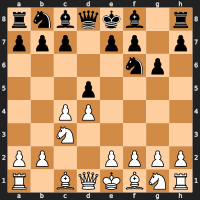

Dropdown(description='Choose Opening:', index=2795, options=('Amar Opening', 'Amar Opening: Paris Gambit', 'Am…

Button(description='Submit', style=ButtonStyle())

Button(description='Reset Board', style=ButtonStyle())

In [174]:
# Display the UI components
print("Select a chess opening and press Submit to see the chessboard layout. You can reset the board using the Reset Board button.")
display(dropdown, submit_button, reset_button)

**STEP 4**: Enter a sequence of moves in SAN and see if it matches any opening

Match found: Clemenz Opening
Moves: 1. h3


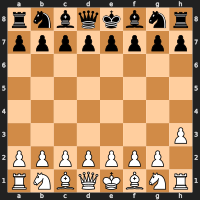

Text(value='1. h3', description='Enter Moves (SAN):', placeholder='e4 e5 Nf3 Nc6', style=DescriptionStyle(desc…

Button(description='Submit', style=ButtonStyle())

Button(description='Reset Board', style=ButtonStyle())

In [176]:
# Access the 'train' split of the dataset
train_data = dset['train']

# Extract relevant data (opening name and PGN moves)
openings_dict2 = {entry["name"]: entry["pgn"] for entry in train_data}

# Function to convert SAN moves to chessboard
def render_chessboard(moves, scale=0.5):
    """
    Renders a chessboard with the given SAN moves and scales it.
    :param moves: A string of SAN moves (e.g., 'e4 e5 Nf3 Nc6').
    :param scale: A scaling factor for the chessboard size (default is 0.5).
    """
    # Remove move numbers (e.g., "1." from "1. e4" and "2." from "2. Nf3")
    sanitized_moves = re.sub(r'\d+\.', '', moves).strip()

    board = chess.Board()
    for move in sanitized_moves.split():
        board.push_san(move)
    svg = chess.svg.board(board, size=int(400 * scale))  # Adjust size dynamically
    display(SVG(svg))

# Function to check if the user input matches the entire opening moves (after sanitization)
def check_san_match(user_input):
    # Remove move numbers from user input (like "1.")
    sanitized_input = re.sub(r'\d+\.', '', user_input).strip()

    # Iterate over all the openings to check if the input matches the entire opening's moves
    for opening_name, opening_pgn in openings_dict2.items():
        # Remove move numbers from the opening PGN for matching
        sanitized_pgn = re.sub(r'\d+\.', '', opening_pgn).strip()

        # Check if the entire sanitized input matches the entire sanitized PGN
        if sanitized_input == sanitized_pgn:
            return opening_name, opening_pgn
    return None, None

# Event handler for the submit button
def on_submit(change):
    clear_output(wait=True)  # Clear previous output
    user_input = san_input.value.strip()  # Get user input
    opening_name, opening_pgn = check_san_match(user_input)  # Check for match

    if opening_name:
        print(f"Match found: {opening_name}")
        print(f"Moves: {opening_pgn}")
        render_chessboard(opening_pgn)  # Render the chessboard with the matching opening moves
    else:
        print("No match found.")

    # Redisplay the input and buttons
    display(san_input, submit_button, reset_button)

# Event handler for the reset button
def on_reset(change):
    clear_output(wait=True)
    print("The board has been reset.")
    render_chessboard("")  # Display an empty board
    display(san_input, submit_button, reset_button)

# Create the input box for SAN moves
san_input = widgets.Text(
    description="Enter Moves (SAN):",
    placeholder="e4 e5 Nf3 Nc6",
    style={'description_width': 'initial'}
)

# Create the submit button
submit_button = widgets.Button(description="Submit")
submit_button.on_click(on_submit)  # Link button to the submit event handler

# Create the reset button
reset_button = widgets.Button(description="Reset Board")
reset_button.on_click(on_reset)  # Link button to the reset event handler

# Display the UI components
print("Enter your moves in SAN format (e.g., 'e4 e5 Nf3 Nc6') and press Submit. You can reset the board using the Reset Board button.")
display(san_input, submit_button, reset_button)

**STEP 5**: Enter keyword for opening, select from suggested and associated openings, and get the chess board configuration for that opening

In [182]:
from threading import Timer

# Extract relevant data (opening name and PGN moves)
openings_dict2 = {entry["name"]: entry["pgn"] for entry in train_data}
opening_names = list(openings_dict2.keys())  # List of all opening names

# Function to convert SAN moves to chessboard
def render_chessboard(moves, scale=0.5):
    """
    Renders a chessboard with the given SAN moves and scales it.
    :param moves: A string of SAN moves (e.g., 'e4 e5 Nf3 Nc6').
    :param scale: A scaling factor for the chessboard size (default is 0.5).
    """
    # Remove move numbers (e.g., "1." from "1. e4" and "2." from "2. Nf3")
    sanitized_moves = re.sub(r'\d+\.', '', moves).strip()

    board = chess.Board()
    for move in sanitized_moves.split():
        board.push_san(move)
    svg = chess.svg.board(board, size=int(400 * scale))  # Adjust size dynamically
    display(SVG(svg))

# Function to filter and return opening suggestions based on input
def get_opening_suggestions(query):
    # Filter opening names based on the query (case insensitive)
    suggestions = [name for name in opening_names if query.lower() in name.lower()]
    return suggestions

# Function to handle opening name selection
def on_opening_name_submit(change):
    clear_output(wait=True)  # Clear previous output
    opening_name = opening_name_input.value.strip()  # Get the opening name input

    if opening_name in openings_dict2:
        opening_pgn = openings_dict2[opening_name]
        print(f"Match found: {opening_name}")
        print(f"Moves: {opening_pgn}")
        render_chessboard(opening_pgn)  # Render the chessboard with the opening's moves
    else:
        print("No match found.")

    # Redisplay the input and buttons
    display(opening_name_input, submit_button, suggestion_dropdown)

# Create the input box for opening name
opening_name_input = widgets.Text(
    description="Enter Keyword for Opening:",
    placeholder="e.g. Zukertort",
    style={'description_width': 'initial'}
)

# Create a submit button
submit_button = widgets.Button(description="Submit")
submit_button.on_click(on_opening_name_submit)  # Link button to the submit event handler

# Create the autosuggest dropdown
suggestion_dropdown = widgets.Dropdown(
    options=[],
    description='Suggestions:',
    style={'description_width': 'initial'},
    layout={'width': '100%', 'display': 'none'}
)

# Function to handle autosuggest with debounce
def on_name_input_change(change):
    global debounce_timer  # Reference the global timer

    query = change.new  # Get the new value from the input field

    # Clear the existing timer (if it's running)
    if debounce_timer:
        debounce_timer.cancel()

    # Set a new timer to update suggestions after a short delay (500 ms)
    debounce_timer = Timer(0.5, update_suggestions, [query])
    debounce_timer.start()

# Function to update suggestions after the delay
def update_suggestions(query):
    suggestions = get_opening_suggestions(query)

    # Create the dropdown for suggestions
    if suggestions:
        suggestion_dropdown.options = suggestions
        suggestion_dropdown.layout.display = 'block'  # Show the dropdown
    else:
        suggestion_dropdown.layout.display = 'none'  # Hide the dropdown if no suggestions

# Function to handle selection from the dropdown
def on_suggestion_select(change):
    opening_name_input.value = change.new  # Set the input field to the selected suggestion
    on_opening_name_submit(change)  # Submit the selected suggestion

# Link the dropdown selection to the function
suggestion_dropdown.observe(on_suggestion_select, names='value')

# Attach the change handler to the input field for autosuggest
opening_name_input.observe(on_name_input_change, names='value')

# Display the UI components
print("Enter the name of a chess opening to get suggestions and display the chessboard layout.")
display(opening_name_input, submit_button, suggestion_dropdown)

# Initialize the timer as None
debounce_timer = None

Enter the name of a chess opening to get suggestions and display the chessboard layout.


Text(value='', description='Enter Keyword for Opening:', placeholder='e.g. Zukertort', style=DescriptionStyle(…

Button(description='Submit', style=ButtonStyle())

Dropdown(description='Suggestions:', layout=Layout(display='none', width='100%'), options=(), style=Descriptio…